### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [12]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# read the data
data = pd.read_csv('data/foodhub_order.csv')
# Copying data to another variable to avoid any changes to the original data
df = data.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [14]:
# Printing number of count of each unique value in customer_id
print(df['customer_id'].value_counts())
print('-' * 50)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
143926     1
89574      1
157711     1
66393      1
358141     1
Name: count, Length: 1200, dtype: int64
--------------------------------------------------


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

The rating has a non numerical value: 'Not given'.

The column day_of_the_week is a categorical variable.

The column customer_id in this context represents a categorical variable.
The above output shows which of the customer could be a potencial loyal client of the application.

The column order_id doesn't add valuable information for the problem context

In [15]:
df.shape

(1898, 9)

The dataframe contains 1898 rows and 9 columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* All columns have 1898 observations. This indicates that there aren't 'Null' values presents.
* The columns order_id, customer_id, food_preparation_time and delivery time are integers data types.
* The columns restaurant_name, cuisine_type, day_of_the_week and rating are object data type.
* The column cost_of_the_order is a float data type.

In [17]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

* There are no missing values in the data.

In [18]:
# Since order_id doesn't add valuable information it will be droped
df = df.drop('order_id', axis=1)
#Calculate the statistical summary for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,1898.0,171168.478398,113698.139743,1311.00,77787.75,128600.00,270525.0000,405334.00
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


In [19]:
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:


*   The minimun time that takes for food to be prepared is 20 min
*   The average time that takes for food to be prepared is 27 min
*   The maximun time that takes for food to be prepared is 35 min

In [20]:
order_no_rating = df[df['rating'] == 'Not given']
print(order_no_rating['rating'].value_counts())
print('-' * 50)

rating
Not given    736
Name: count, dtype: int64
--------------------------------------------------


#### Observations:
There are 736 order not rated from a total of 1898 orders. That is a 38.8% of the orders in the sample are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [21]:
num_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
cat_cols = ['customer_id', 'restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots( # Crea un grid de figuras
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)}, # Distribucion de las figuras (25% y 75%)
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

#### **Observations on cost of orders**

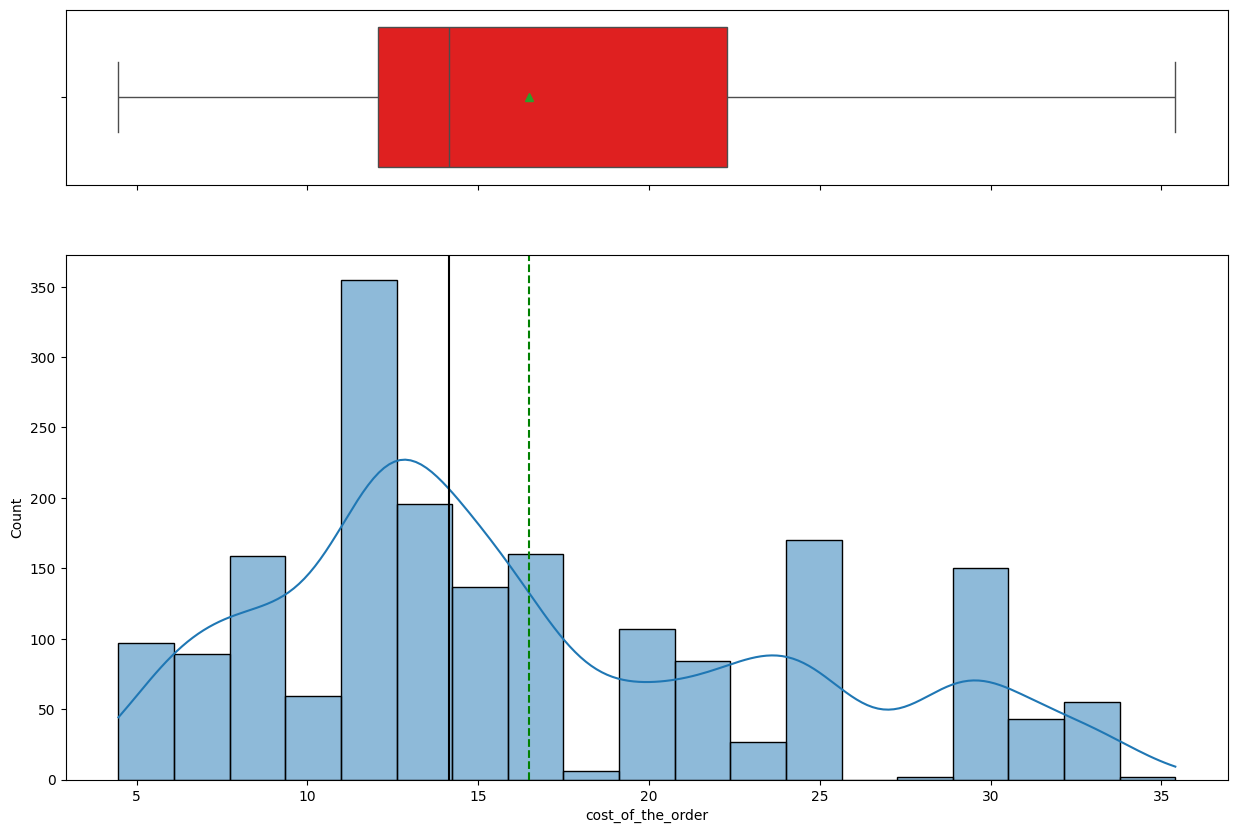

In [22]:
histogram_boxplot(df.cost_of_the_order)

**Observations:**
* The distribution of cost_of_order is little left-skewed.
* Median cost_of_the_order is  ~14.14, but the mean is ~16.
* There are not outliers in this variable.
* The most cost_of_order are at the lower end, between 12 and the mean (~16).

#### **Observations on delivery_time**

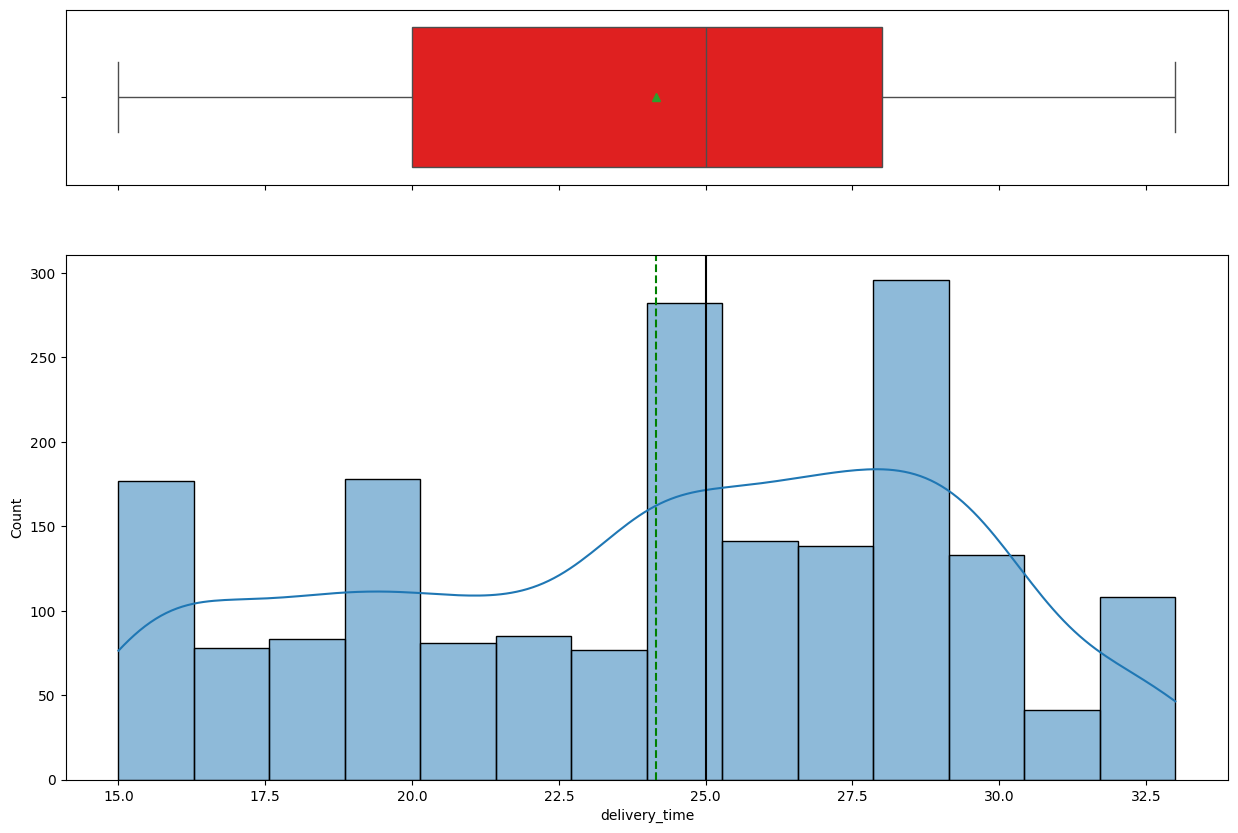

In [23]:
histogram_boxplot(df.delivery_time)

**Observations:**
* The distribution of delivery_time is a bit right skewed.
* The peaks could be related to the type of cuisine.
* Median= 25 and the mean= 24 are close.
* There are not outliers in this variable.

#### **Let's explore the categorical variables**

In [24]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()

#### **Observations on Cuisine Type**

C:\Users\corre\AppData\Local\Temp\ipykernel_22356\3030748728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


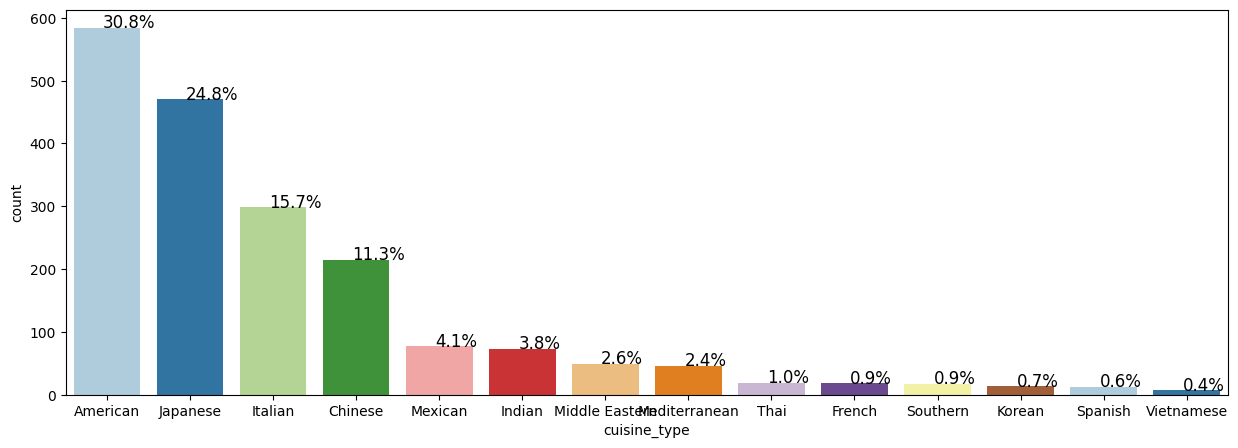

In [25]:
bar_perc(df, 'cuisine_type')

**Observation:**

* The four most popular cuisine types are the American, Japanese, Italian and Chinese, concentrating around 80% of the orders.
* The others cuisine type (10 types) are less frequently ordered.

#### **Observations on Day of the Week**

C:\Users\corre\AppData\Local\Temp\ipykernel_22356\3030748728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


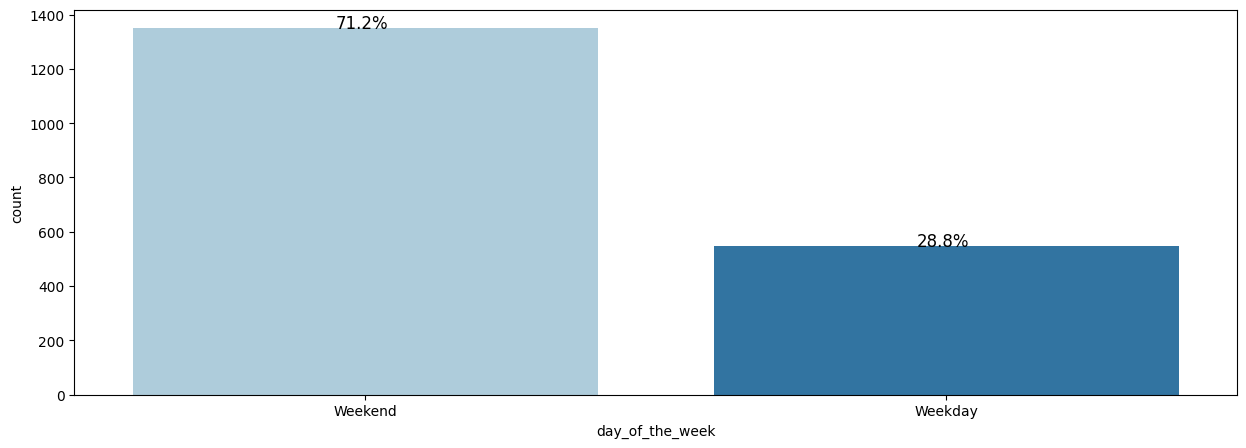

In [26]:
bar_perc(df, 'day_of_the_week')

**Observation:**

* The most of the order are made on weekends, concentrating around 71% of the orders.

#### **Observations on Rating**

C:\Users\corre\AppData\Local\Temp\ipykernel_22356\3030748728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)


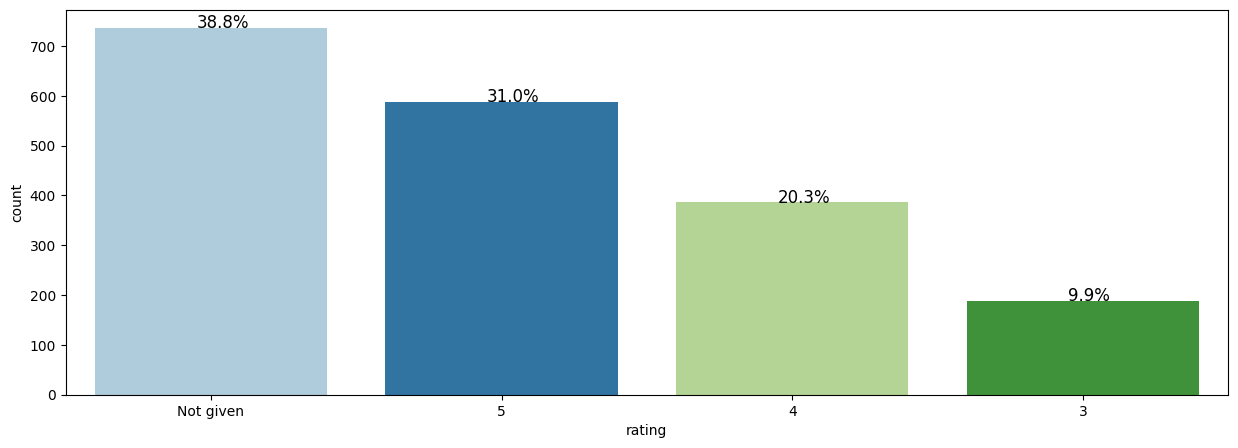

In [27]:
bar_perc(df, 'rating')

**Observation:**

* A significant portion of orders —38.8%— were not rated by customers.
* The restaurants with a positive rating (4-5) represents the 51% of the orders.

 **Top 5 restaurants in terms of the number of orders received**

In [28]:
df['restaurant_name'].value_counts().head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

The top 5 restaurants are:


1.   Shake Shack	               with 219 orders
2.   The Meatball Shop	         with 132 orders
3.   Blue Ribbon Sushi	         with 119 orders
4.   Blue Ribbon Fried Chicken	 with 96 orders
5.   Parm	                       with 68 orders


**The most popular cuisine on weekends**

In [29]:
filter_weekend = df['day_of_the_week'] == 'Weekend'
df[filter_weekend]['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
The most popular cuisine on weekends is the American cuisine.

**Percentage of the orders cost more than 20 dollars**

In [30]:
filter_cost = df['cost_of_the_order'] > 20
df[filter_cost].shape[0] / df.shape[0] * 100

29.24130663856691

#### Observations:
The percentage of the orders cost more than 20 dollars is 29,24%

**The mean order delivery time**

In [31]:
df['delivery_time'].mean()

np.float64(24.161749209694417)

#### Observations:
The mean order delivery time is 24 min

**The top 3 most frequent customers**

In [32]:
#Top 3 most frequent customer
top_customer = df['customer_id'].value_counts().head(3)
print(top_customer)
print('-' * 50)


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64
--------------------------------------------------


#### Observations:
The top 3 most frequent customers are:
1.   Customer ID 52832   with  13 orders.
2.   Customer ID 47440   with 10 orders.
3.   Customer ID 83287   with  9 orders.
